# Knihovny

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import seaborn
import numpy as np
import os

# Načtení dat

In [2]:
graf_2 = pd.read_excel(r"C:\Users\Tomáš Smažík\Desktop\Data\data\fred.xlsx", sheet_name=1)

In [3]:
graf_2

,date,Real Case-Schiller Index,Nominal Households Net Worth,CPI
0,1988-01-01,100.00000,100.00000,100.00000
1,1988-04-01,102.51284,102.28940,101.28755
2,1988-07-01,104.68669,104.00203,102.57511
3,1988-10-01,105.70221,106.67108,103.60515
4,1989-01-01,107.33656,108.94002,104.89270
...,...,...,...,...
146,2024-07-01,468.44383,900.26444,270.25837
147,2024-10-01,466.47481,903.27750,272.62060
148,2025-01-01,472.77566,893.82028,274.34764
149,2025-04-01,478.45623,933.05292,275.96567


# Převedení Net Worth na Real

In [4]:
graf_2['Real Household Net Worth'] = (graf_2['Nominal Households Net Worth'] / graf_2['CPI']) * 100

# Úprava

In [5]:
graf_2 = graf_2.drop(columns=['CPI', 'Nominal Households Net Worth'])
graf_2 = graf_2.set_index('date')

In [6]:
graf_2

,Real Case-Schiller Index,Real Household Net Worth
date,,
1988-01-01,100.00000,100.000000
1988-04-01,102.51284,100.989115
1988-07-01,104.68669,101.391098
1988-10-01,105.70221,102.959245
1989-01-01,107.33656,103.858534
...,...,...
2024-07-01,468.44383,333.112510
2024-10-01,466.47481,331.331345
2025-01-01,472.77566,325.798421


# Graf

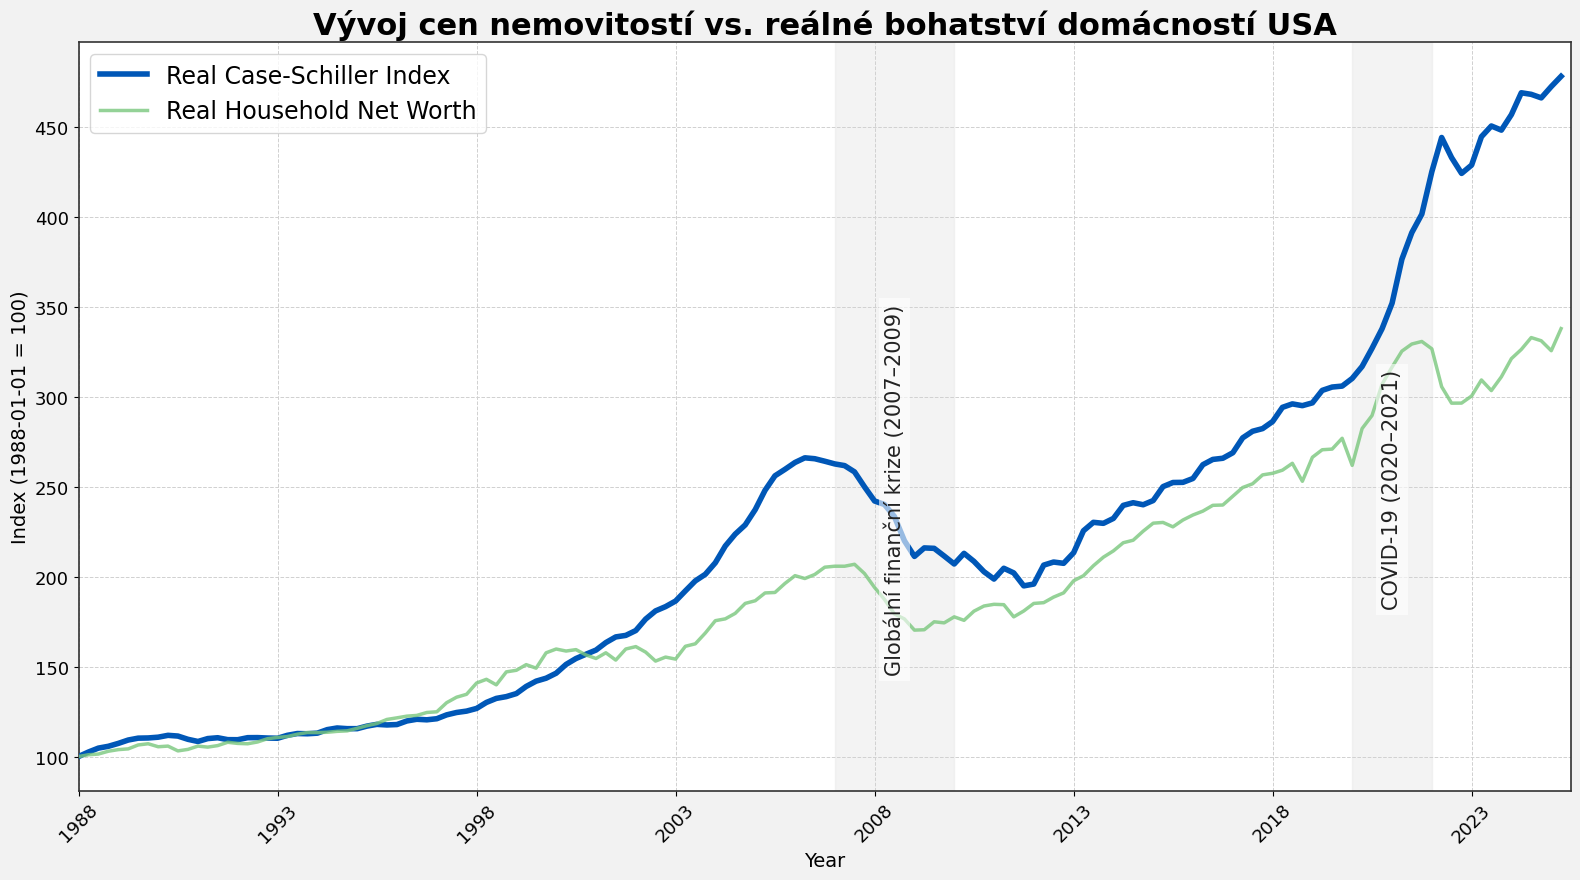

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# -------------------------------------------------------
# Převod indexu na datetime (pokud ještě není)
# -------------------------------------------------------
graf_2.index = pd.to_datetime(graf_2.index)

# -------------------------------------------------------
# Custom profesionální styl
# -------------------------------------------------------
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "#f2f2f2",
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1.2,
    "grid.color": "#d0d0d0",
    "grid.linewidth": 0.7,
    "grid.linestyle": "--",
    "font.size": 13
})

fig, ax1 = plt.subplots(figsize=(16, 9))

# Barvy
color_main = "#0057b7"
color_subtle = "#7ac77d"

# -------------------------------------------------------
# Levá osa — hlavní křivky
# -------------------------------------------------------
ax1.plot(
    graf_2.index,
    graf_2['Real Case-Schiller Index'],
    color=color_main,
    linewidth=4,
    label='Real Case-Schiller Index',
    zorder=5
)

ax1.plot(
    graf_2.index,
    graf_2['Real Household Net Worth'],
    color=color_subtle,
    linewidth=2.5,
    alpha=0.8,
    label='Real Household Net Worth',
    zorder=5
)

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Index (1988-01-01 = 100)', fontsize=14)

ax1.grid(True)

# -------------------------------------------------------
# Šedé pásy + VERTIKÁLNÍ text PŘED GRAFEM (pro datetime index)
# -------------------------------------------------------
def shade_period(start_year, end_year, text):
    start = pd.Timestamp(f"{start_year}-01-01")
    end = pd.Timestamp(f"{end_year}-12-31")
    ax1.axvspan(start, end, color="#e6e6e6", alpha=0.45, zorder=1)
    ax1.text(
        start + (end - start)/2,
        ax1.get_ylim()[1] * 0.50,
        text,
        fontsize=15,
        ha="center",
        va="center",
        color="#222222",
        rotation=90,
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"),
        zorder=9
    )

# Příklad použití
shade_period(2007, 2009, "Globální finanční krize (2007–2009)")
shade_period(2020, 2021, "COVID-19 (2020–2021)")

# -------------------------------------------------------
# Osa X — použijeme datový index a zobrazíme jen roky
# -------------------------------------------------------
ax1.set_xlim(graf_2.index.min(), graf_2.index.max())

# Zobrazíme jen některé roky, aby osa nebyla přeplněná
years = pd.date_range(start=graf_2.index.min(), end=graf_2.index.max(), freq='5YS')  # každých 5 let
ax1.set_xticks(years)
ax1.set_xticklabels([d.year for d in years], rotation=45)

# -------------------------------------------------------
# Legenda — VĚTŠÍ PÍSMO
# -------------------------------------------------------
ax1.legend(
    loc="upper left",
    frameon=True,
    facecolor="white",
    fontsize=17
)

# -------------------------------------------------------
# Titulek
# -------------------------------------------------------
plt.title('Vývoj cen nemovitostí vs. reálné bohatství domácností USA', fontsize=22, weight="bold")
plt.tight_layout()

# -------------------------------------------------------
# Uložení
# -------------------------------------------------------
output_path = r"C:\Users\Tomáš Smažík\Desktop\Data\výsledky\graf_1.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, dpi=300)